In [184]:
#Table of Contents:
 #1.Loading the data
 #2.Understanding the data
 #3.Exploratory Data Analysis (EDA)
   #i) Univariate Analysis
   #ii) Bivariate Analysis
 #4.Missing value and outlier treatment
 #5.Feature Engineering
 #6.Model Building :
   #i) Logistic Regression
   #ii) Decision Tree
   #iii) Random Forest
   #iv) XGBClassifier

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [186]:
train = pd.read_csv("C:\\Users\\mi\\Desktop\\python\\train.csv")
test = pd.read_csv("C:\\Users\\mi\\Desktop\\python\\test.csv")

In [187]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [188]:
train_original = train.copy()
test_original = test.copy()

In [189]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [190]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [191]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [192]:
print('Training data shape: ', train.shape)
train.head()

Training data shape:  (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [193]:
print('Test data shape: ', test.shape)
test.head()

Test data shape:  (367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [194]:
#Performing EDA

In [195]:
#Uni variate Analysis
#Analysis on Loan Status
train["Loan_Status"].count()

np.int64(614)

In [196]:
train["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [197]:
# Normalize can be set to True to print proportions instead of number
train["Loan_Status"].value_counts(normalize=True)*100

Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64

<Axes: title={'center': 'Loan_Status'}, xlabel='Loan_Status'>

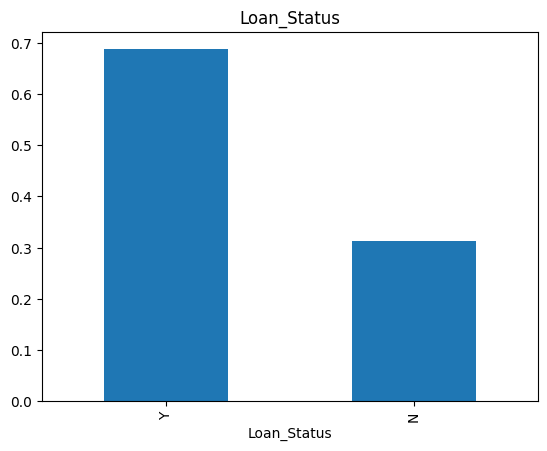

In [198]:
train["Loan_Status"].value_counts(normalize=True).plot.bar(title = 'Loan_Status')

In [199]:
#Analysis on gender variable
train["Gender"].count()

np.int64(601)

In [200]:
train["Gender"].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [201]:
train['Gender'].value_counts(normalize=True)*100

Gender
Male      81.364393
Female    18.635607
Name: proportion, dtype: float64

<Axes: title={'center': 'Gender'}, xlabel='Gender'>

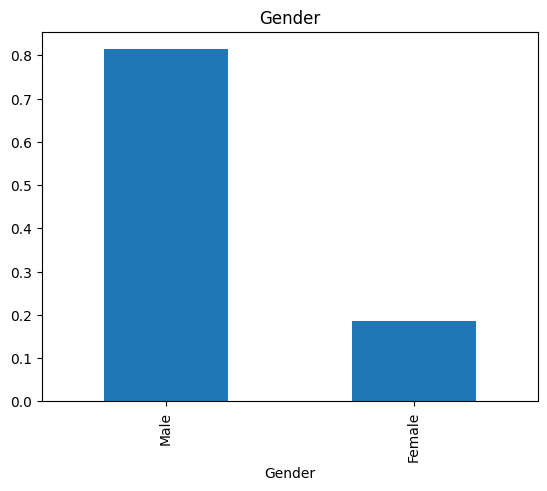

In [202]:
train['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender')

In [203]:
#Analysis on married variable
train["Married"].count()

np.int64(611)

In [204]:
train["Married"].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [205]:
train['Married'].value_counts(normalize=True)*100

Married
Yes    65.139116
No     34.860884
Name: proportion, dtype: float64

<Axes: title={'center': 'Married'}, xlabel='Married'>

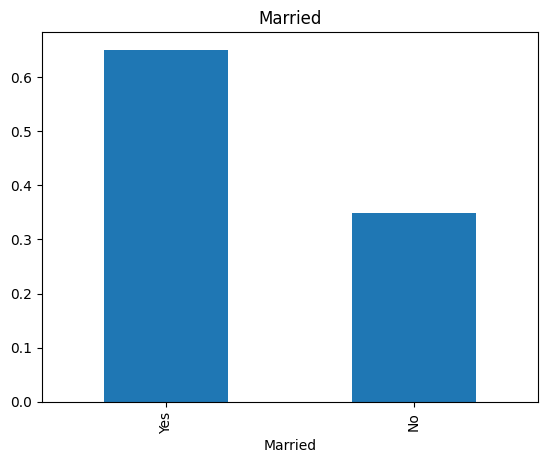

In [206]:
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

In [207]:
#Analysis on Self_Employed Variable
train["Self_Employed"].count()

np.int64(582)

In [208]:
train["Self_Employed"].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [209]:
train['Self_Employed'].value_counts(normalize=True)*100

Self_Employed
No     85.910653
Yes    14.089347
Name: proportion, dtype: float64

<Axes: title={'center': 'Self_Employed'}, xlabel='Self_Employed'>

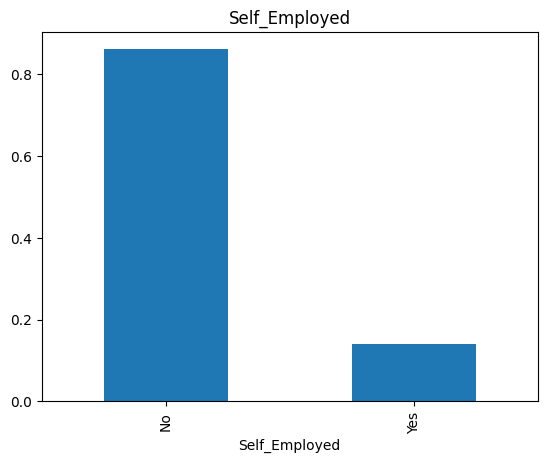

In [210]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

In [211]:
#Analysis on credit History Variable
train["Credit_History"].count()

np.int64(564)

In [212]:
train["Credit_History"].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [213]:
train['Credit_History'].value_counts(normalize=True)*100

Credit_History
1.0    84.219858
0.0    15.780142
Name: proportion, dtype: float64

<Axes: title={'center': 'Credit_History'}, xlabel='Credit_History'>

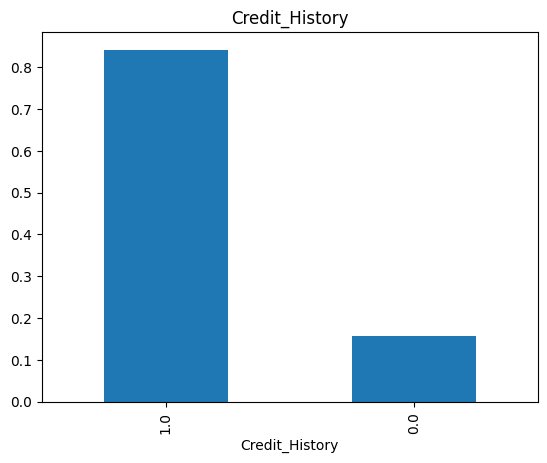

In [214]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

In [215]:
#Analysis on Dependents variable
train['Dependents'].count()

np.int64(599)

In [216]:
train["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [217]:
train['Dependents'].value_counts(normalize=True)*100

Dependents
0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: proportion, dtype: float64

<Axes: title={'center': 'Dependents'}, xlabel='Dependents'>

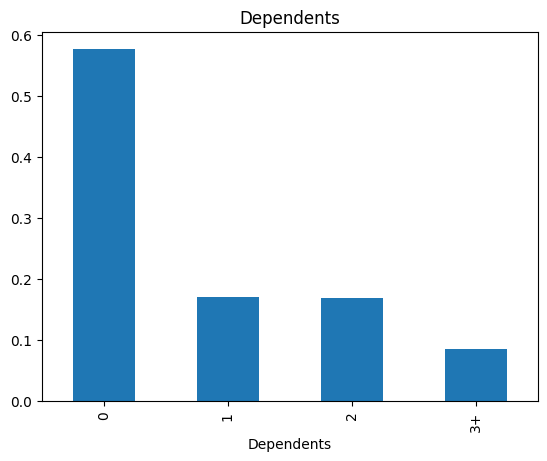

In [218]:
train['Dependents'].value_counts(normalize=True).plot.bar(title="Dependents")

In [219]:
#Analaysis on Education variable
train["Education"].count()

np.int64(614)

In [220]:
train["Education"].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [221]:
train["Education"].value_counts(normalize=True)*100

Education
Graduate        78.175896
Not Graduate    21.824104
Name: proportion, dtype: float64

<Axes: title={'center': 'Education'}, xlabel='Education'>

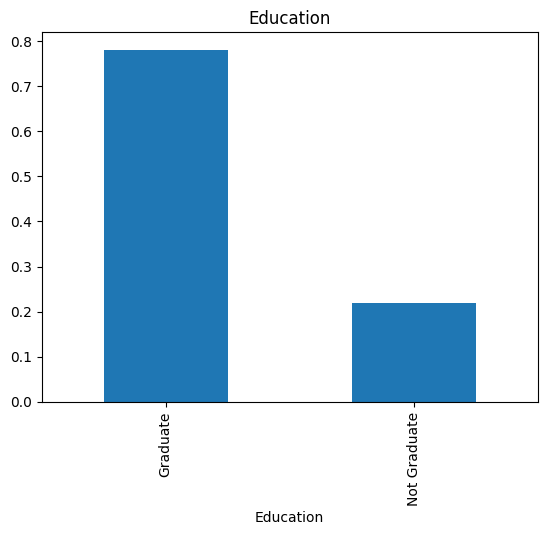

In [222]:
train["Education"].value_counts(normalize=True).plot.bar(title = "Education")

In [223]:
#Analysis on Property_Area variable
train["Property_Area"].count()

np.int64(614)

In [224]:
train["Property_Area"].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [225]:
train["Property_Area"].value_counts(normalize=True)*100

Property_Area
Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: proportion, dtype: float64

<Axes: title={'center': 'Property_Area'}, xlabel='Property_Area'>

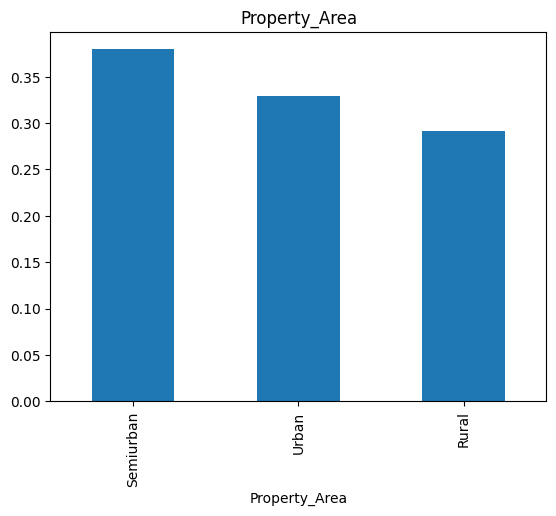

In [226]:
train["Property_Area"].value_counts(normalize=True).plot.bar(title="Property_Area")

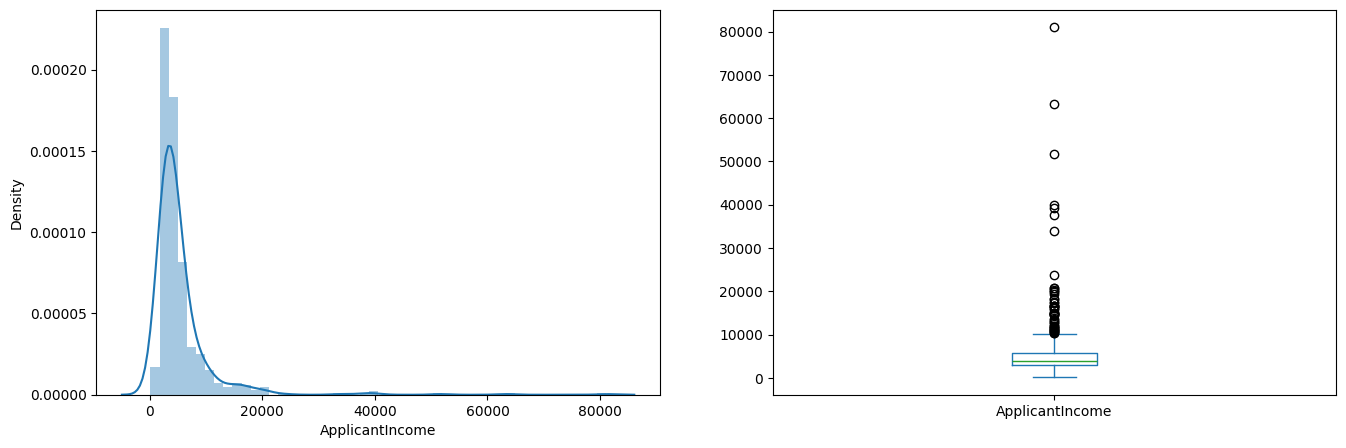

In [227]:
#Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

#Applicant Income Distribution
plt.figure(1)
plt.subplot(121)
sns.distplot(train["ApplicantIncome"]);

plt.subplot(122)
train["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

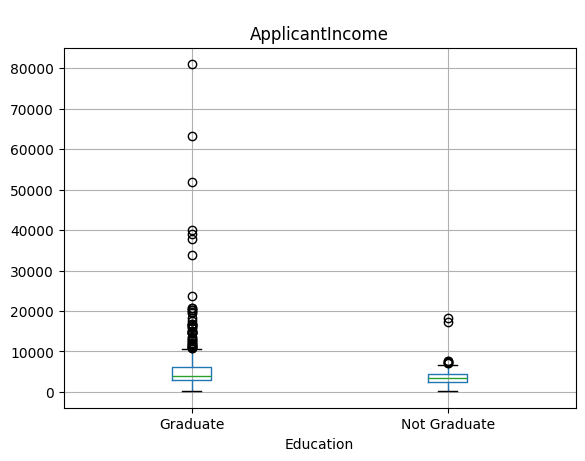

In [228]:
#Segregating by Education
train.boxplot(column='ApplicantIncome',by="Education" )
plt.suptitle(" ")
plt.show()

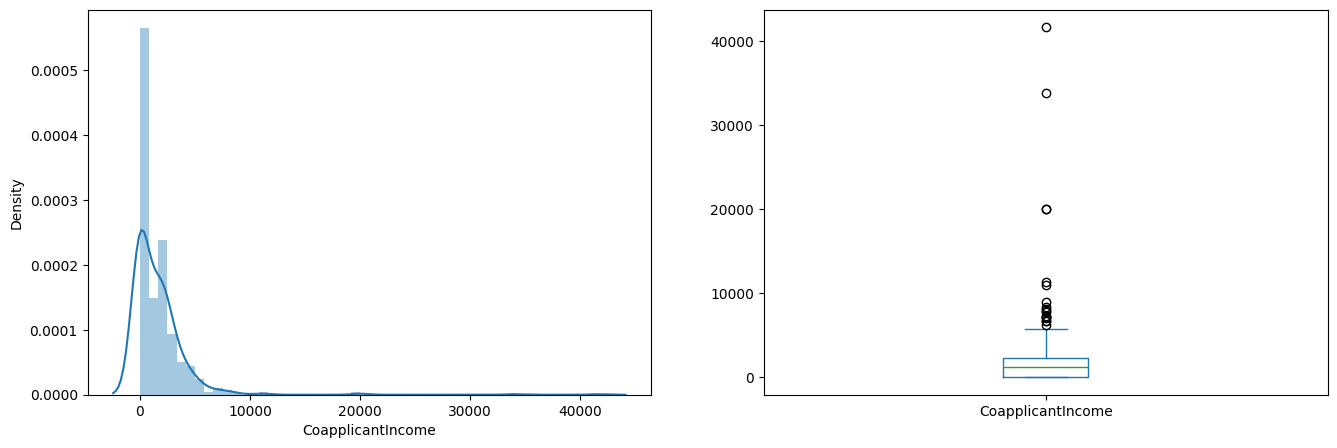

In [229]:
#Co Applicant Distribution
plt.figure(1)
plt.subplot(121)
sns.distplot(train["CoapplicantIncome"]);

plt.subplot(122)
train["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

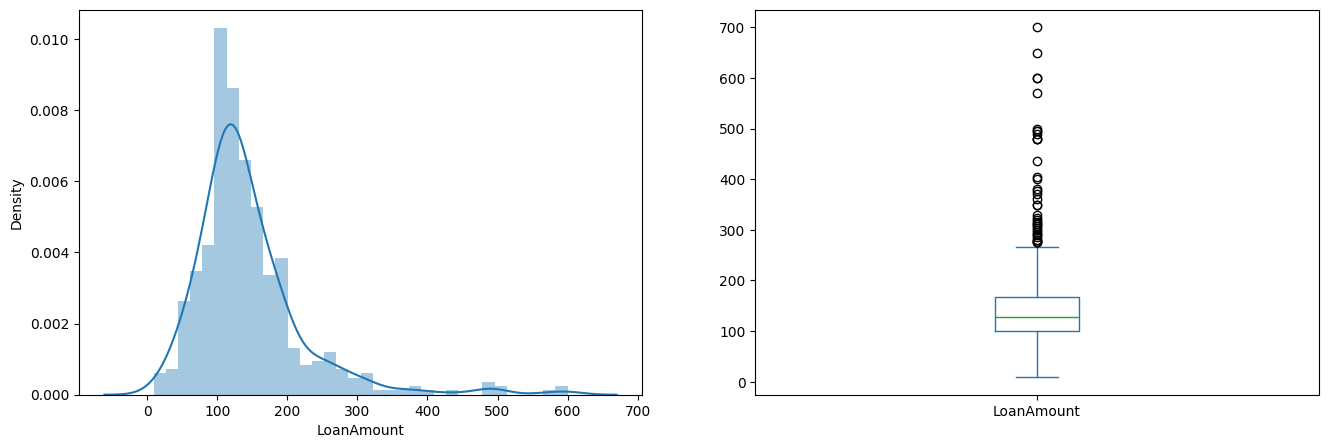

In [230]:
#Loan Amount Distribution
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

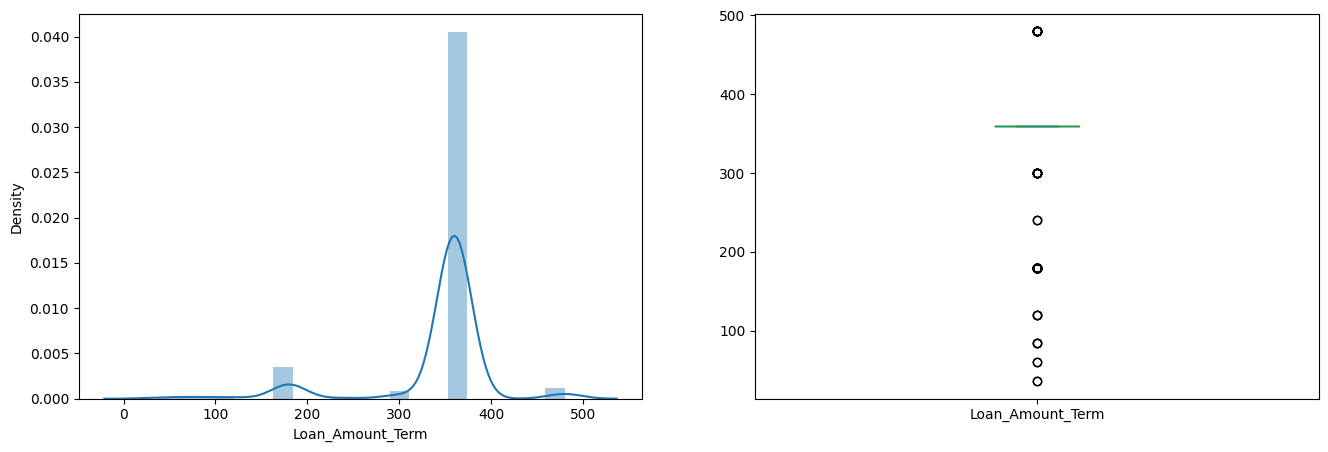

In [231]:
#Loan Amount Term Distribution
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(df["Loan_Amount_Term"]);

plt.subplot(122)
df["Loan_Amount_Term"].plot.box(figsize=(16,5))
plt.show()

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


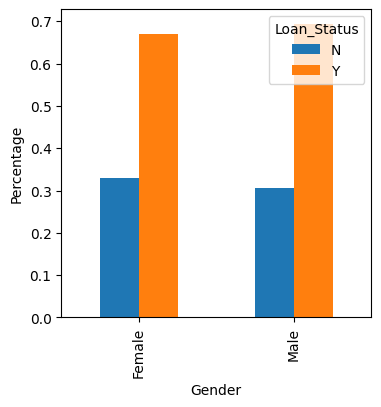

In [232]:
#Bi-Variate Analysis
#Relation between Loan Status and Gender
print(pd.crosstab(train["Gender"],train["Loan_Status"]))
Gender = pd.crosstab(train["Gender"],train["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


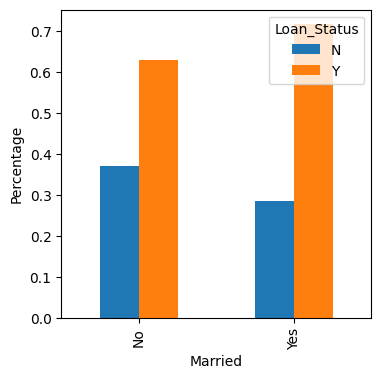

In [233]:
#Relation between Loan Status and Married
print(pd.crosstab(train["Married"],train["Loan_Status"]))
Married=pd.crosstab(train["Married"],train["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


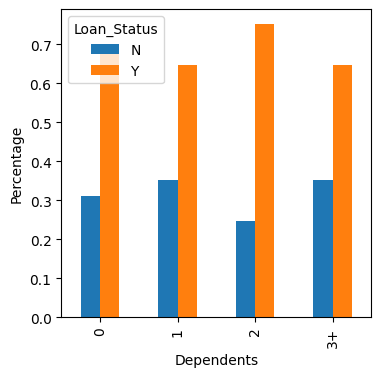

In [234]:
#Relation between Loan Status and Dependents
print(pd.crosstab(train['Dependents'],train["Loan_Status"]))
Dependents = pd.crosstab(train['Dependents'],train["Loan_Status"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))
plt.xlabel("Dependents")
plt.ylabel("Percentage")
plt.show()

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


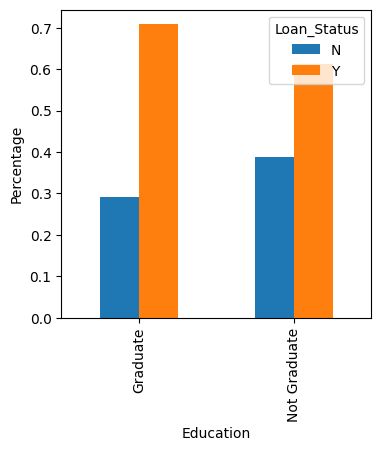

In [235]:
#Relation between Loan Status and Education
print(pd.crosstab(train["Education"],train["Loan_Status"]))
Education = pd.crosstab(train["Education"],train["Loan_Status"])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))
plt.xlabel("Education")
plt.ylabel("Percentage")
plt.show()

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


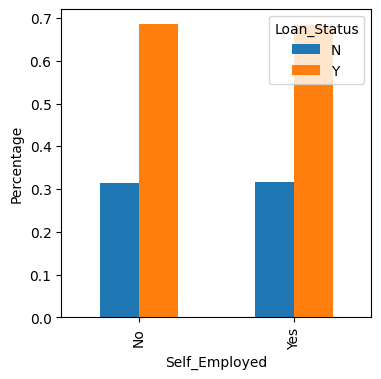

In [236]:
#Relation between Loan Status and self Employed
print(pd.crosstab(train["Self_Employed"],train["Loan_Status"]))
SelfEmployed = pd.crosstab(train["Self_Employed"],train["Loan_Status"])
SelfEmployed.div(SelfEmployed.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))
plt.xlabel("Self_Employed")
plt.ylabel("Percentage")
plt.show()

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


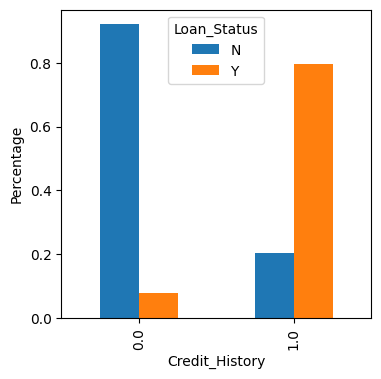

In [237]:
#Relation between Loan Status and Credit History
print(pd.crosstab(train["Credit_History"],train["Loan_Status"]))
CreditHistory = pd.crosstab(train["Credit_History"],train["Loan_Status"])
CreditHistory.div(CreditHistory.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))
plt.xlabel("Credit_History")
plt.ylabel("Percentage")
plt.show()

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


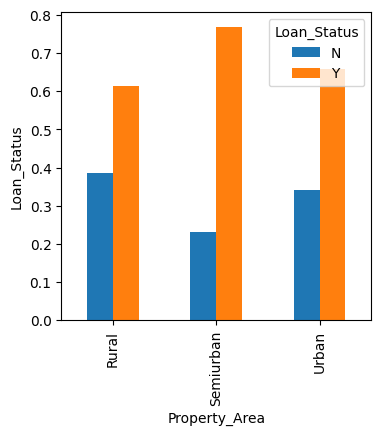

In [238]:
#Relation between Loan Status and Property Area
print(pd.crosstab(train["Property_Area"],train["Loan_Status"]))
PropertyArea = pd.crosstab(train["Property_Area"],train["Loan_Status"])
PropertyArea.div(PropertyArea.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))
plt.xlabel("Property_Area")
plt.ylabel("Loan_Status")
plt.show()

<Axes: xlabel='Loan_Status'>

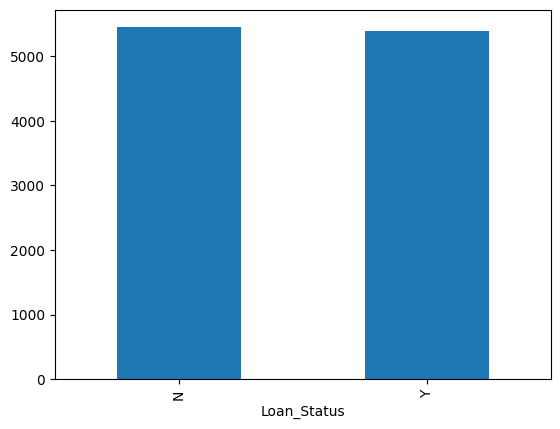

In [239]:
#Numerical Independent variable vs Target Variable
#Realtion between Loan Status and Income
train.groupby("Loan_Status")['ApplicantIncome'].mean().plot.bar()

In [240]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

Loan_Status   N    Y
Income_bin          
Low          26   57
Average      51  123
High         32   79
Very high    39   73


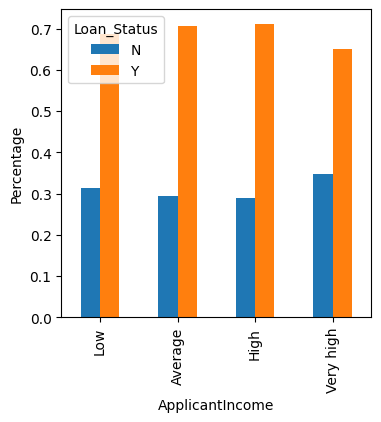

In [241]:
print(pd.crosstab(train["Income_bin"],train["Loan_Status"]))
Income_bin = pd.crosstab(train["Income_bin"],train["Loan_Status"])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

In [242]:
#Co Applicant
bins=[0,1000,3000,42000]
group =['Low','Average','High']
train['CoapplicantIncome_bin']=pd.cut(df["CoapplicantIncome"],bins,labels=group)

Loan_Status             N    Y
CoapplicantIncome_bin         
Low                     3   15
Average                46  123
High                   24   53


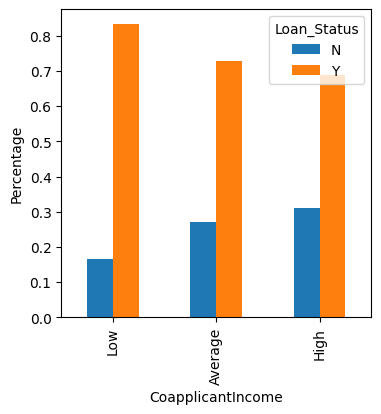

In [243]:
print(pd.crosstab(train["CoapplicantIncome_bin"],train["Loan_Status"]))
CoapplicantIncome_Bin = pd.crosstab(train["CoapplicantIncome_bin"],train["Loan_Status"])
CoapplicantIncome_Bin.div(CoapplicantIncome_Bin.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(4,4))
plt.xlabel("CoapplicantIncome")
plt.ylabel("Percentage")
plt.show()

In [244]:
#Total Income
train["TotalIncome"]=train["ApplicantIncome"]+train["CoapplicantIncome"]

In [245]:
bins =[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train["TotalIncome_bin"]=pd.cut(train["TotalIncome"],bins,labels=group)

Loan_Status       N    Y
TotalIncome_bin         
Low              14   10
Average          32   87
High             65  159
Very High        81  166


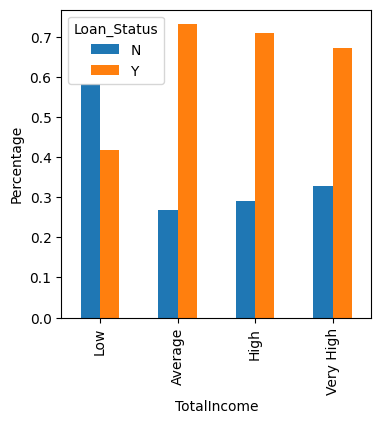

In [246]:
print(pd.crosstab(train["TotalIncome_bin"],train["Loan_Status"]))
TotalIncome = pd.crosstab(train["TotalIncome_bin"],train["Loan_Status"])
TotalIncome.div(TotalIncome.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(4,4))
plt.xlabel("TotalIncome")
plt.ylabel("Percentage")
plt.show()

In [247]:
#Relation between loan Status and loan Amount
bins = [0,100,200,700]
group=['Low','Average','High']
train["LoanAmount_bin"]=pd.cut(df["LoanAmount"],bins,labels=group)

Loan_Status      N    Y
LoanAmount_bin         
Low             38   86
Average         83  207
High            27   39


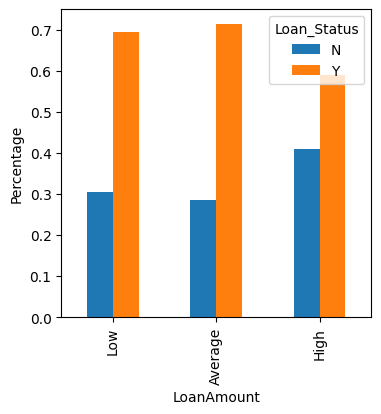

In [248]:
print(pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"]))
LoanAmount=pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"])
LoanAmount.div(LoanAmount.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(4,4))
plt.xlabel("LoanAmount")
plt.ylabel("Percentage")
plt.show()

In [249]:
#Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable
train=train.drop(["Income_bin","CoapplicantIncome_bin","LoanAmount_bin","TotalIncome","TotalIncome_bin"],axis=1)

In [250]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

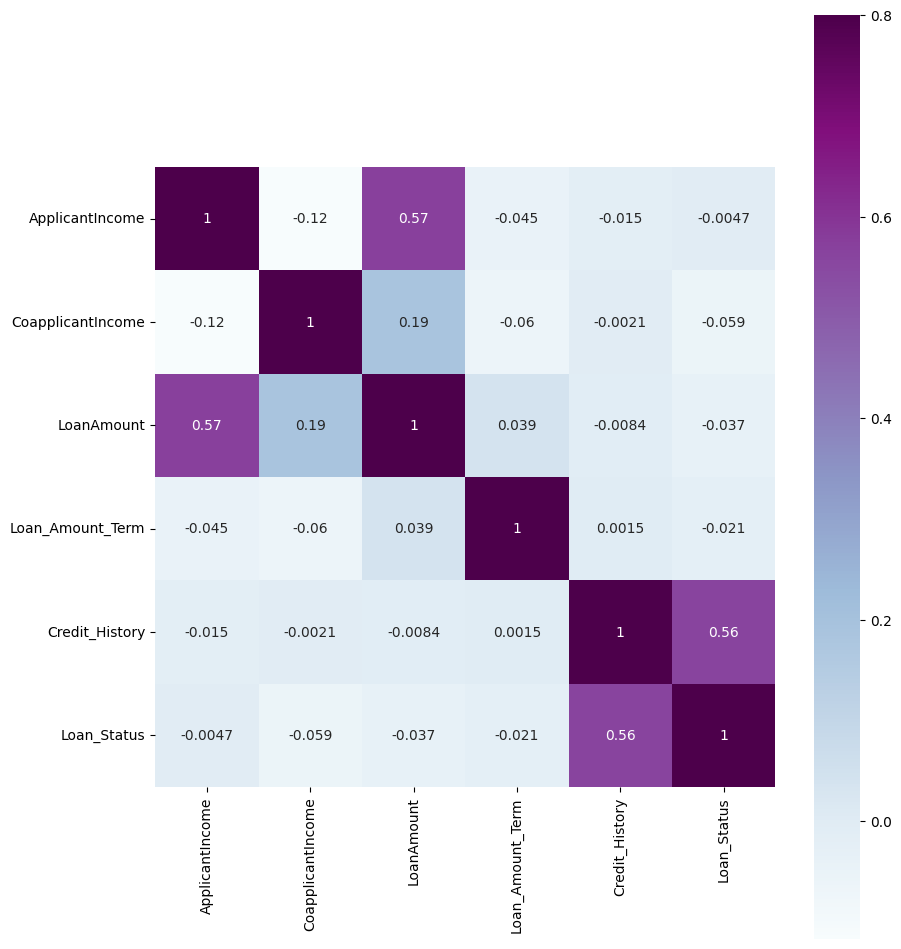

In [251]:
matrix = matrix = train.select_dtypes(include=[np.number]).corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True);

In [252]:
#Treating missing Values and Outliers
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [253]:
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
train["Married"].fillna(train["Married"].mode()[0],inplace=True)
train['Dependents'].fillna(train["Dependents"].mode()[0],inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)

In [254]:
train["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [255]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)

In [256]:
train["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [257]:
train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)

In [258]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [259]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [260]:
test["Gender"].fillna(test["Gender"].mode()[0],inplace=True)
test['Dependents'].fillna(test["Dependents"].mode()[0],inplace=True)
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0],inplace=True)
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0],inplace=True)
test["Credit_History"].fillna(test["Credit_History"].mode()[0],inplace=True)
test["LoanAmount"].fillna(test["LoanAmount"].median(),inplace=True)

In [261]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

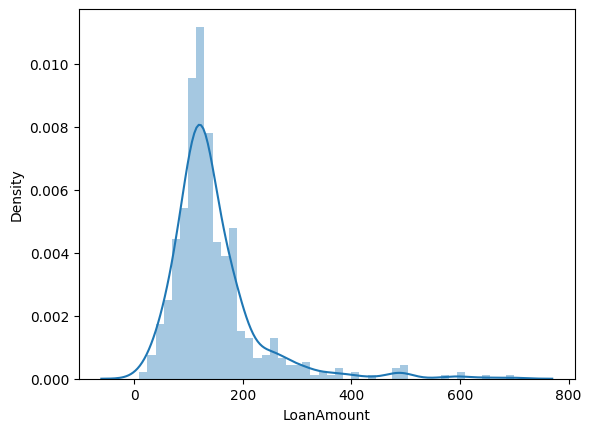

In [262]:
sns.distplot(train["LoanAmount"]);

<Axes: >

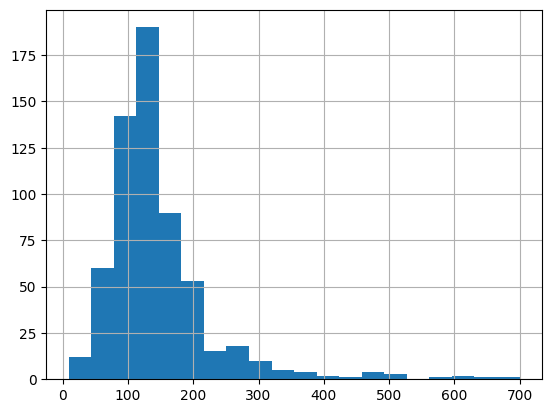

In [263]:
train['LoanAmount'].hist(bins=20)

<Axes: >

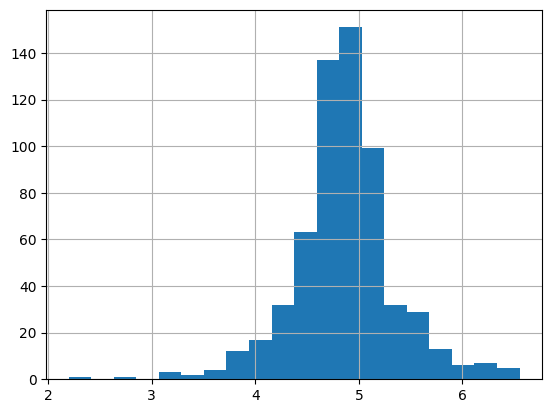

In [264]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

<Axes: xlabel='LoanAmount_log', ylabel='Density'>

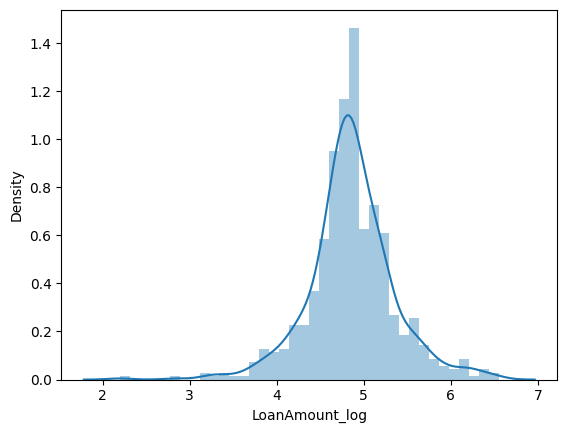

In [265]:
sns.distplot(train["LoanAmount_log"])

<Axes: >

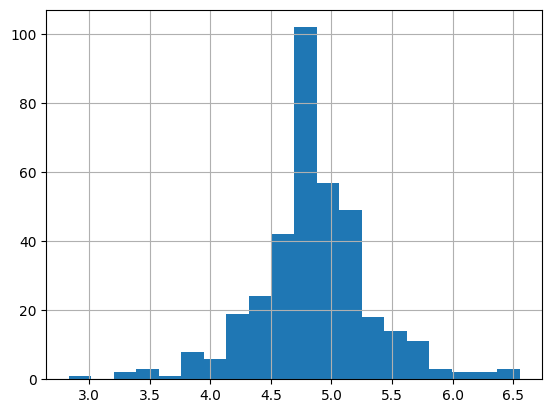

In [266]:
test["LoanAmount_log"]=np.log(train["LoanAmount"])
test['LoanAmount_log'].hist(bins=20)

<Axes: xlabel='LoanAmount_log', ylabel='Density'>

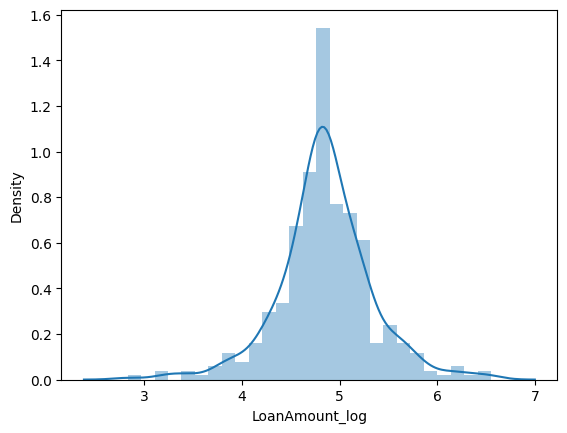

In [267]:
sns.distplot(test["LoanAmount_log"])

In [268]:
#Feature engineering
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']

In [269]:
train["TotalIncome"].head()

0    5849.0
1    6091.0
2    3000.0
3    4941.0
4    6000.0
Name: TotalIncome, dtype: float64

In [270]:
test["TotalIncome"]=test["ApplicantIncome"]+test["CoapplicantIncome"]

In [271]:
test['TotalIncome'].head()

0    5720
1    4576
2    6800
3    4886
4    3276
Name: TotalIncome, dtype: int64

<Axes: xlabel='TotalIncome', ylabel='Density'>

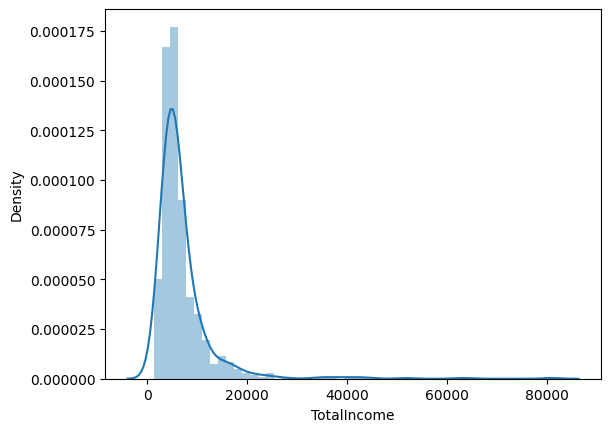

In [272]:
sns.distplot(train["TotalIncome"])

<Axes: xlabel='TotalIncome_log', ylabel='Density'>

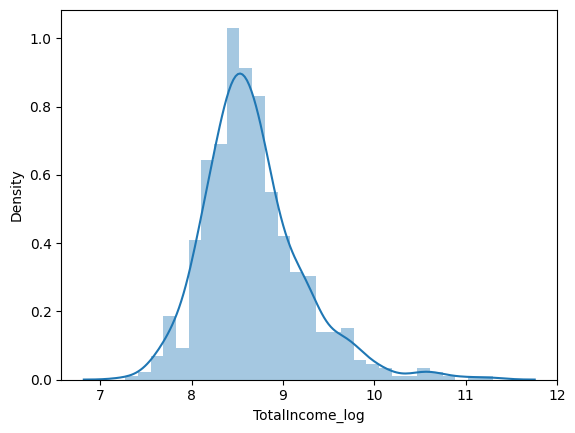

In [273]:
train["TotalIncome_log"]=np.log(train["TotalIncome"])
sns.distplot(train["TotalIncome_log"])

<Axes: xlabel='TotalIncome', ylabel='Density'>

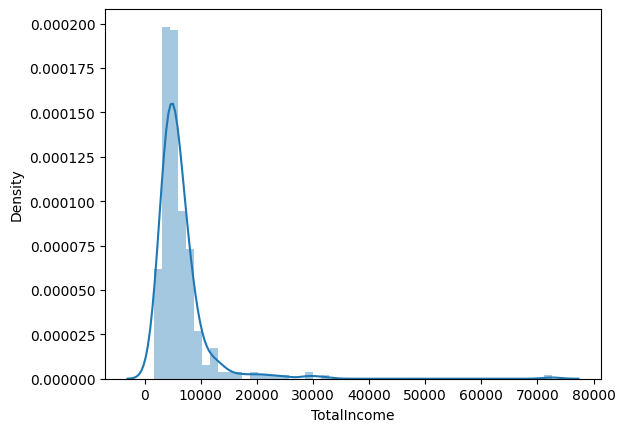

In [274]:
sns.distplot(test["TotalIncome"])

<Axes: xlabel='TotalIncome_log', ylabel='Density'>

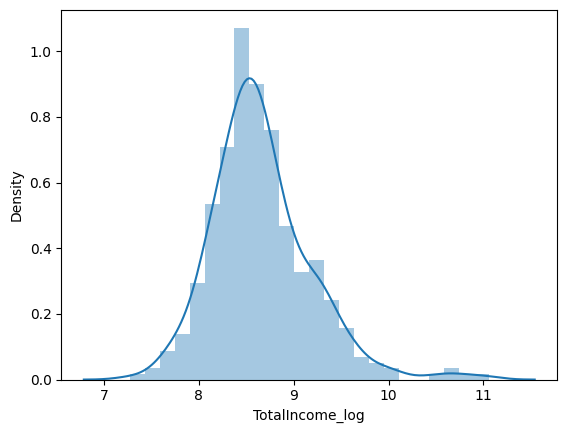

In [275]:
test["TotalIncome_log"] = np.log(train["TotalIncome"])
sns.distplot(test["TotalIncome_log"])

In [276]:
#Creating a new EMI feature
train["EMI"]=train["LoanAmount"]/train["Loan_Amount_Term"]
test["EMI"]=test["LoanAmount"]/test["Loan_Amount_Term"]

In [277]:
train[["EMI"]].head()

,EMI
0,0.355556
1,0.355556
2,0.183333
3,0.333333
4,0.391667


In [278]:
test[["EMI"]].head()

,EMI
0,0.305556
1,0.350000
2,0.577778
3,0.277778
4,0.216667


<Axes: xlabel='EMI', ylabel='Density'>

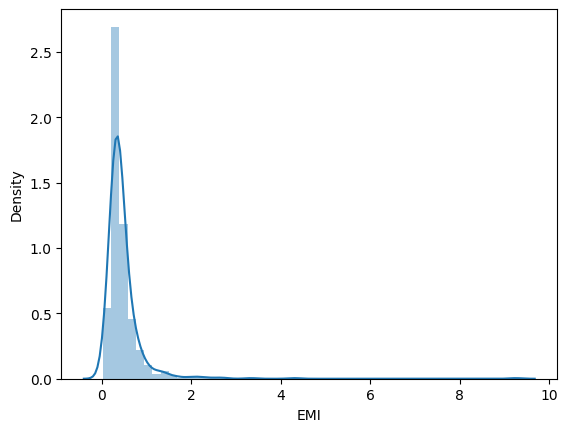

In [279]:
sns.distplot(train["EMI"])

<Axes: xlabel='EMI', ylabel='Density'>

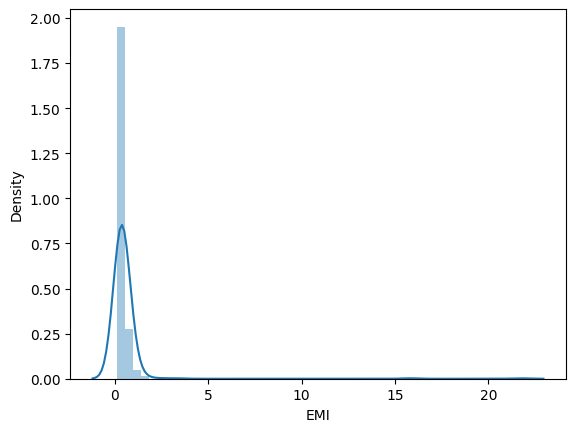

In [280]:
sns.distplot(test["EMI"])

In [281]:
#Creating balance income
train["Balance_Income"] = train["TotalIncome"]-train["EMI"]*1000 # To make the units equal we multiply with 1000
test["Balance_Income"] = test["TotalIncome"]-test["EMI"]

In [282]:
train[["Balance_Income"]].head()

,Balance_Income
0,5493.444444
1,5735.444444
2,2816.666667
3,4607.666667
4,5608.333333


In [283]:
test[["Balance_Income"]].head()

,Balance_Income
0,5719.694444
1,4575.650000
2,6799.422222
3,4885.722222
4,3275.783333


In [284]:
#Reducing Noise
train=train.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [285]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,1,4.852030,5849.0,8.674026,0.355556,5493.444444
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,0,4.852030,6091.0,8.714568,0.355556,5735.444444
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,1,4.189655,3000.0,8.006368,0.183333,2816.666667
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,1,4.787492,4941.0,8.505323,0.333333,4607.666667
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,1,4.948760,6000.0,8.699515,0.391667,5608.333333


In [286]:
test = test.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [287]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,LP001015,Male,Yes,0,Graduate,No,1.0,Urban,4.852030,5720,8.674026,0.305556,5719.694444
1,LP001022,Male,Yes,1,Graduate,No,1.0,Urban,4.852030,4576,8.714568,0.350000,4575.650000
2,LP001031,Male,Yes,2,Graduate,No,1.0,Urban,4.189655,6800,8.006368,0.577778,6799.422222
3,LP001035,Male,Yes,2,Graduate,No,1.0,Urban,4.787492,4886,8.505323,0.277778,4885.722222
4,LP001051,Male,No,0,Not Graduate,No,1.0,Urban,4.948760,3276,8.699515,0.216667,3275.783333


In [288]:
#Model Building
train=train.drop("Loan_ID",axis=1 ,errors="ignore")
test=test.drop("Loan_ID",axis=1 ,errors="ignore")

X=train.drop("Loan_Status",axis=1)
y=train[["Loan_Status"]]



In [289]:
X = pd.get_dummies(X)

In [290]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [291]:
from sklearn.model_selection import train_test_split

In [292]:
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3,random_state=1)

In [293]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logistic_model = LogisticRegression(random_state=1)
logistic_model.fit(x_train,y_train)

LogisticRegression(random_state=1)

In [294]:
pred_cv_logistic=logistic_model.predict(x_cv)

score_logistic =accuracy_score(pred_cv_logistic,y_cv)
score_logistic

0.7891891891891892

In [295]:
pred_test_logistic = logistic_model.predict(test)
print(pred_test_logistic)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [296]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=1)

tree_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [297]:
pred_cv_tree=tree_model.predict(x_cv)
score_tree =accuracy_score(pred_cv_tree,y_cv)
score_tree

0.7135135135135136

In [298]:
pred_test_tree = tree_model.predict(test)
print(pred_test_tree)

[1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1
 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1
 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0
 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0
 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1
 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1
 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0
 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0
 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1]


In [299]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)
forest_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=1)

In [300]:
pred_cv_forest=forest_model.predict(x_cv)
score_forest = accuracy_score(pred_cv_forest,y_cv)
score_forest

0.7783783783783784

In [301]:
pred_test_forest=forest_model.predict(test)
print(pred_test_forest)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [302]:
#XGBOOST
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=50,learning_rate=0.1)
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [303]:
pred_xgb=xgb_model.predict(x_cv)
score_xgb = accuracy_score(pred_xgb,y_cv)
score_xgb

0.7783783783783784

In [304]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=50,learning_rate=0.2)
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [305]:
pred_xgb=xgb_model.predict(x_cv)
score_xgb = accuracy_score(pred_xgb,y_cv)
score_xgb

0.7567567567567568

In [306]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=50,learning_rate=0.5)
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.5, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [307]:
pred_xgb=xgb_model.predict(x_cv)
score_xgb = accuracy_score(pred_xgb,y_cv)
score_xgb

0.7675675675675676

In [308]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=50,learning_rate=0.01)
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [309]:
pred_xgb=xgb_model.predict(x_cv)
score_xgb = accuracy_score(pred_xgb,y_cv)
score_xgb

0.7891891891891892

In [310]:
#Logistic Regression model gives : 76% prediction accuracy
#Decision Tree model gives : 71% prediction accuracy
#Random Forest model gives : 78% prediction accuracy
#XGBClassifier model gives a range from 76-78% when trained on learning rate 0.01, 0.1, 0.2 and 0.5

In [311]:
d = dict()
for j in range(1,6):
    print('L_Rate = ',j*0.1)
    l = []
    for i in range(50,101,10):
        xgb_model = XGBClassifier(learning_rate = j*0.1,n_estimators=i)
        xgb_model.fit(x_train, y_train)
        y_predict = xgb_model.predict(x_cv)
        print("\t",i,":",accuracy_score(y_cv,y_predict))
        acc = accuracy_score(y_cv, y_predict)
        if i in d.keys():
            d[i].append(acc)
        else:
            d[i]=[acc]

L_Rate =  0.1
	 50 : 0.7783783783783784
	 60 : 0.7783783783783784
	 70 : 0.7837837837837838
	 80 : 0.7783783783783784
	 90 : 0.7783783783783784
	 100 : 0.7783783783783784
L_Rate =  0.2
	 50 : 0.7567567567567568
	 60 : 0.7675675675675676
	 70 : 0.7621621621621621
	 80 : 0.7675675675675676
	 90 : 0.7675675675675676
	 100 : 0.772972972972973
L_Rate =  0.30000000000000004
	 50 : 0.7891891891891892
	 60 : 0.772972972972973
	 70 : 0.772972972972973
	 80 : 0.7675675675675676
	 90 : 0.772972972972973
	 100 : 0.7675675675675676
L_Rate =  0.4
	 50 : 0.7783783783783784
	 60 : 0.7837837837837838
	 70 : 0.7783783783783784
	 80 : 0.7783783783783784
	 90 : 0.772972972972973
	 100 : 0.7675675675675676
L_Rate =  0.5
	 50 : 0.7675675675675676
	 60 : 0.7621621621621621
	 70 : 0.7837837837837838
	 80 : 0.772972972972973
	 90 : 0.7837837837837838
	 100 : 0.772972972972973


In [312]:
d

{50: [0.7783783783783784,
  0.7567567567567568,
  0.7891891891891892,
  0.7783783783783784,
  0.7675675675675676],
 60: [0.7783783783783784,
  0.7675675675675676,
  0.772972972972973,
  0.7837837837837838,
  0.7621621621621621],
 70: [0.7837837837837838,
  0.7621621621621621,
  0.772972972972973,
  0.7783783783783784,
  0.7837837837837838],
 80: [0.7783783783783784,
  0.7675675675675676,
  0.7675675675675676,
  0.7783783783783784,
  0.772972972972973],
 90: [0.7783783783783784,
  0.7675675675675676,
  0.772972972972973,
  0.772972972972973,
  0.7837837837837838],
 100: [0.7783783783783784,
  0.772972972972973,
  0.7675675675675676,
  0.7675675675675676,
  0.772972972972973]}

In [313]:
x=[0.1,0.2,0.3,0.4,0.5]

Text(0, 0.5, 'Precision')

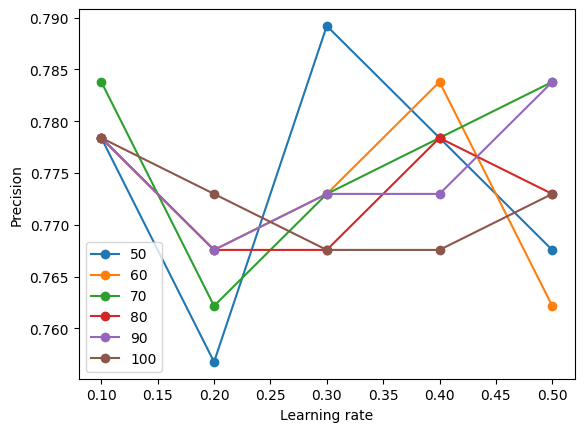

In [314]:
plt.plot(x,d[50],marker='o')
plt.plot(x,d[60],marker='o')
plt.plot(x,d[70],marker='o')
plt.plot(x,d[80],marker='o')
plt.plot(x,d[90],marker='o')
plt.plot(x,d[100],marker='o')
plt.legend([50,60,70,80,90,100])
plt.xlabel('Learning rate')
plt.ylabel('Precision')

In [315]:
print(train.columns)


Index(['Credit_History', 'Loan_Status', 'LoanAmount_log', 'TotalIncome',
       'TotalIncome_log', 'EMI', 'Balance_Income', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')
